In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("/kaggle/input/imdb-50k-movie-reviews-test-your-bert/train.csv")

In [3]:
train

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg
...,...,...
24995,"This film is fun, if your a person who likes a...",pos
24996,After seeing this film I feel like I know just...,pos
24997,first this deserves about 5 stars due to actin...,neg
24998,If you like films that ramble with little plot...,neg


In [4]:
test = pd.read_csv("/kaggle/input/imdb-50k-movie-reviews-test-your-bert/test.csv")

In [5]:
test.head()

,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos


In [6]:
train = train[:5000]
test = test[:800]

In [7]:
train_data = train.to_dict(orient='records')

In [8]:
train_data[:2]

[{'text': "Now, I won't deny that when I purchased this off eBay, I had high expectations. This was an incredible out-of-print work from the master of comedy that I so enjoy. However, I was soon to be disappointed. Apologies to those who enjoyed it, but I just found the Compleat Al to be very difficult to watch. I got a few smiles, sure, but the majority of the funny came from the music videos (which I've got on DVD) and the rest was basically filler. You could tell that this was not Al's greatest video achievement (that honor goes to UHF). Honestly, I doubt if this will ever make the jump to DVD, so if you're an ultra-hardcore Al fan and just HAVE to own everything, buy the tape off eBay. Just don't pay too much for it.",
  'sentiment': 'neg'},
 {'text': 'The saddest thing about this "tribute" is that almost all the singers (including the otherwise incredibly talented Nick Cave) seem to have missed the whole point where Cohen\'s intensity lies: by delivering his lines in an almost tun

In [9]:
test_data = test.to_dict(orient="records")

In [10]:
train["text"]

0       Now, I won't deny that when I purchased this o...
1       The saddest thing about this "tribute" is that...
2       Last night I decided to watch the prequel or s...
3       I have to admit that i liked the first half of...
4       I was not impressed about this film especially...
                              ...                        
4995    My god this movie is awfully boring. I am a bi...
4996    This could have been a rather entertaining fil...
4997    this film was totally not what i expected. <br...
4998    I'm getting a little tired of people misusing ...
4999    I really enjoyed this movie. I am a single dad...
Name: text, Length: 5000, dtype: object

In [11]:
train_texts = [df["text"] for df in train_data]

In [12]:
train_labels = [df["sentiment"] for df in train_data]

In [13]:
test_texts = [df["text"] for df in test_data]
test_labels = [df["sentiment"] for df in test_data]

In [14]:
sentences = [len(sent) for sent in train_texts]

<BarContainer object of 5000 artists>

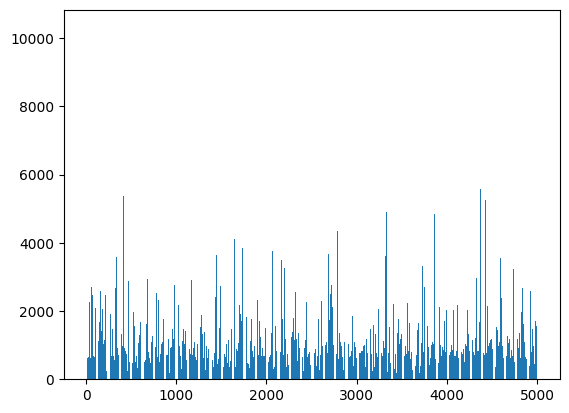

In [15]:
import matplotlib.pyplot as plt
plt.bar(range(1,5001),sentences)

In [16]:
!pip install pytorch_pretrained_bert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 87.3 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.69
    Uninstalling botocore-1.34.69:
      Successfully uninstalled botocore-1.34.69
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.29.165 which is incompatible.


In [17]:
from pytorch_pretrained_bert import BertTokenizer

In [18]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased",do_lower_case=True)

100%|██████████| 231508/231508 [00:00<00:00, 3005354.25B/s]


In [19]:
train_tokens = [["[CLS]"]+tokenizer.tokenize(t)[:512]+["[SEP]"] for t in train_texts]

In [20]:
test_tokens = [["[CLS]"]+tokenizer.tokenize(t)[:512]+["[SEP]"] for t in test_texts]

In [21]:
from keras.preprocessing.sequence import pad_sequences


train_token_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids,train_tokens)),maxlen=512,truncating="post",padding="post",dtype="int")
test_token_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids,test_tokens)),maxlen=512,truncating="post",padding="post",dtype="int")

2024-04-20 11:20:17.487011: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 11:20:17.487106: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 11:20:17.615331: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [22]:
train_token_ids

array([[ 101, 2085, 1010, ...,    0,    0,    0],
       [ 101, 1996, 6517, ...,    0,    0,    0],
       [ 101, 2197, 2305, ...,    0,    0,    0],
       ...,
       [ 101, 2023, 2143, ...,    0,    0,    0],
       [ 101, 1045, 1005, ...,    0,    0,    0],
       [ 101, 1045, 2428, ...,    0,    0,    0]])

In [23]:
train_token_ids.shape

(5000, 512)

In [24]:
import numpy as np
train_y = np.array(train_labels) == "pos"
test_y = np.array(test_labels) == "pos"

masking few ids to remove basis

In [25]:
train_mask = [[float(i>0) for i in k]for k in train_token_ids]
test_mask = [[float(i>0) for i in k]for k in test_token_ids]

baseline

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [27]:
base_model = make_pipeline(CountVectorizer(ngram_range=(1,3)),LogisticRegression()).fit(train_texts,train_labels)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
baseline_predicted = base_model.predict(test_texts)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,baseline_predicted))

              precision    recall  f1-score   support

         neg       0.87      0.85      0.86       410
         pos       0.85      0.87      0.86       390

    accuracy                           0.86       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800



In [30]:
from pytorch_pretrained_bert import BertModel

In [31]:
from torch import nn

class bertbinary(nn.Module):
  def __init__(self,droup_rate=0.1):
    super(bertbinary,self).__init__()
    self.bert = BertModel.from_pretrained("bert-base-uncased")
    self.droupout = nn.Dropout(droup_rate)
    self.Linear = nn.Linear(768,1)
    self.sigmoid = nn.Sigmoid()
  def forward(self,tokens,mask=None):
    _ , pooled_output =  self.bert(tokens,attention_mask=mask,output_all_encoded_layers=False)
    droup_out = self.droupout(pooled_output)
    linear_output = self.Linear(droup_out)
    proba = self.sigmoid(linear_output)
    return proba

In [32]:
classifer = bertbinary()

100%|██████████| 407873900/407873900 [00:07<00:00, 52847338.12B/s]


In [33]:
import torch

train_toekns_torch = torch.tensor(train_token_ids)
train_labels_torch = torch.tensor(train_y.reshape(-1,1)).float()

test_toekns_torch = torch.tensor(test_token_ids)
test_labels_torch = torch.tensor(test_y.reshape(-1,1)).float()

train_mask_tensor = torch.tensor(train_mask)
test_mask_tensor = torch.tensor(test_mask)

In [34]:
from torch.utils.data import TensorDataset , RandomSampler ,DataLoader

train_dataset = TensorDataset(train_toekns_torch,train_mask_tensor,train_labels_torch)
sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset,sampler=sampler,batch_size = 4)

test_dataset = TensorDataset(test_toekns_torch,test_mask_tensor,test_labels_torch)
t_sampler = RandomSampler(test_dataset)
test_dataloader = DataLoader(test_dataset,sampler=t_sampler,batch_size = 4)

In [35]:
param_optimizer = list(classifer.sigmoid.named_parameters())
optimizer_grouped_parameters = [{"params":[p for n,p in param_optimizer]}]

In [36]:
optimizer_grouped_parameters

[{'params': []}]

In [37]:
x = torch.tensor(train_token_ids[:3])
y, pooled = classifer.bert(x, output_all_encoded_layers=False)
print(x.shape,y.shape,pooled.shape)

torch.Size([3, 512]) torch.Size([3, 512, 768]) torch.Size([3, 768])


In [38]:
y = classifer(x)


In [39]:
from torch.nn.utils import clip_grad_norm_
from torch.optim import Adam


In [40]:
optimizer = Adam(classifer.parameters(),lr=3e-6)
from IPython.display import clear_output

In [ ]:
for epoch in range(10):
  classifer.train()
  train_loss = 0
  for num , batch_data in enumerate(train_dataloader):
    token_ids , masks , labels = tuple(t for t in batch_data)
    logits = classifer(token_ids,masks)
    loss_funct = nn.BCELoss()
    batch_loss = loss_funct(logits,labels)
    train_loss += batch_loss.item()
    classifer.zero_grad()
    batch_loss.backward()
    clip_grad_norm_(parameters = classifer.parameters(),max_norm=1.0)
    optimizer.step()
    clear_output(wait=True)
    print('Epoch: ', num + 1)
    print("\r" + "{0}/{1} loss: {2} ".format(num, len(train_data) / 4, train_loss / (num + 1)))

In [ ]:
classifer.eval()
model_predicted = []
all_logits = []
with torch.no_grad():
    for num , batch_data in enumerate(test_dataloader):
        token_ids , masks , labels = tuple(t for t in batch_data)
        logits = classifer(token_ids , masks)
        loss_function = nn.BCELoss()
        batch_loss = loss_function(logits,labels)
        numpy_logits = logits.numpy()
        all_logits += list(numpy_logits[:,0])
        bert_predicted += list(numpy_logits[:,0] > 0.5)

In [ ]:
print(classification_report(test_y,model_predicted))